In [1]:
#load libraries needed for this:
import subprocess, sys

for line in open("libraries.txt"):
    if line.strip():
        mod, *alias = line.strip().split(" as ")
        alias = alias[0] if alias else mod.split(".")[-1]
        try:
            globals()[alias] = __import__(mod, fromlist=[''])
        except ImportError:
            subprocess.check_call([sys.executable, "-m", "pip", "install", mod])
            globals()[alias] = __import__(mod, fromlist=[''])
        print(f"{mod} imported as {alias}")

pybis imported as pybis
os imported as os
pandas imported as pd
glob imported as glob
matplotlib.pyplot imported as plt


In [2]:
# add domain name, change the following to your own domain instance
ob_connection = pybis.Openbis("https://openbis-empa-test.ethz.ch")
# add Personal Access Token: Found in Admin UI > Tools > Access > Personal Access Token
# needs to be created if not done yet; owner will be the Registrator in openBIS

# PAT is confidential: Could this be handled with secrets?
ob_connection.set_token("$pat-stefanie.hauser_AT_empa.ch-250904140348722x5B6147EF643E93EC34F017969FBD7855")

print(ob_connection)

In [3]:
# get collection/ default experiment where data is located
coll = ob_connection.get_collection("/GROUPA_STEFFI/RENKU_USE_CASE/RENKU_USE_CASE_EXP_4")
# get objects within the collection
collection_objects = coll.get_objects()

The following cell only to be runned if datasets are not yet downloaded

In [8]:
## block command in jupyter: [ctrl] + / (from numpad)

# find datasets attached in coll and load them to a folder called datasets here
# since sessions are temporary, everything will be deleted anyway, when session is stopped (as far as i understood)
# here only csv and xlsx files are used for loading

# # Make sure the destination folder exists
# os.makedirs("datasets", exist_ok=True)

# for attachment in collection_objects:
#     for dataset in attachment.get_datasets():
#         # Get the dataset object dynamically
#         ds = ob_connection.get_dataset(dataset.permid)

#         # Filter the dataset's file list for only CSV or XLSX files
#         files_to_download = [
#             f for f in ds.file_list
#             if f.lower().endswith((".csv", ".xlsx"))
#         ]

#         # Skip datasets without matching files
#         if not files_to_download:
#             print(f"Skipping {dataset.permId} (no CSV/XLSX files)")
#             continue        
        
#         ds.download(
#             files=ds.file_list,
#             destination="./datasets",
#             wait_until_finished=True
#         )

#         print(f"Downloaded dataset: {dataset.permId}")

In [15]:
from collections import Counter

data_dir = "datasets"
file_counter = Counter()

for root, _, files in os.walk(data_dir):
    for file in files:
        _, ext = os.path.splitext(file)
        if ext:
            file_counter[ext.lower()] += 1  # increment count for this extension

print("File types and counts:", file_counter)

File types and counts: Counter({'.csv': 20})


In [16]:
# see how many files are found
# in case there would be as well xlsx files they 

data_dir = os.path.join(os.getcwd(), "datasets")  # or your datasets folder
file_list = glob.glob(os.path.join(data_dir, '**', '*.csv'), recursive=True)
file_list += glob.glob(os.path.join(data_dir, '**', '*.xlsx'), recursive=True)

print(f"Found {len(file_list)} data files.")

Found 17 data files.


In [17]:
# Files found by glob
print("Glob files:")
for f in file_list:
    print(f)

# Files counted by os.walk
print("\nWalk files:")
for root, _, files in os.walk(data_dir):
    for f in files:
        print(f)

Glob files:
/home/renku/work/openbis-renku/datasets/20251006094036087-3704/original/230330_FS2-3.csv
/home/renku/work/openbis-renku/datasets/20251006093237895-3700/original/230223_FS_5-3.csv
/home/renku/work/openbis-renku/datasets/20251006093753888-3703/original/230315_FS_5-3.csv
/home/renku/work/openbis-renku/datasets/20251006094155669-3705/original/230530FS1-3.csv
/home/renku/work/openbis-renku/datasets/20251006091341449-3691/original/FS-Aceton_220921_124032.csv
/home/renku/work/openbis-renku/datasets/20251006091054242-3690/original/FS_EtOH_220920_132622.csv
/home/renku/work/openbis-renku/datasets/20251006091744178-3693/original/DMSO_FS_0923_133114.csv
/home/renku/work/openbis-renku/datasets/20251006093005213-3699/original/230209_FS_2-3.csv
/home/renku/work/openbis-renku/datasets/20251006091534466-3692/original/pentanolfs_0922_160111.csv
/home/renku/work/openbis-renku/datasets/20251006092255247-3696/original/230206_FS_5-3_0207_151545.csv
/home/renku/work/openbis-renku/datasets/202510

In [11]:
#example of one file
df = pd.read_csv(file_list [1], sep=',', skiprows=8)  # adjust skiprows if needed
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,Terminal,Questionable,Origin,Relative Time,Channel,CH Label
0,1.738626,Volt DC,10,6.5,F,F,F,F,F,F,Front,F,Main,60046.312141,NaN,NaN
1,1.738617,Volt DC,10,6.5,F,F,F,F,F,F,Front,F,Main,60046.512289,NaN,NaN
2,1.738605,Volt DC,10,6.5,F,F,F,F,F,F,Front,F,Main,60046.712438,NaN,NaN
3,1.738600,Volt DC,10,6.5,F,F,F,F,F,F,Front,F,Main,60046.912592,NaN,NaN
4,1.738573,Volt DC,10,6.5,F,F,F,F,F,F,Front,F,Main,60047.112743,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.738616,Volt DC,10,6.5,F,F,F,F,F,F,Front,F,Main,60045.311375,NaN,NaN
99996,1.738604,Volt DC,10,6.5,F,F,F,F,F,F,Front,F,Main,60045.511530,NaN,NaN
99997,1.738615,Volt DC,10,6.5,F,F,F,F,F,F,Front,F,Main,60045.711677,NaN,NaN
99998,1.738637,Volt DC,10,6.5,F,F,F,F,F,F,Front,F,Main,60045.911838,NaN,NaN


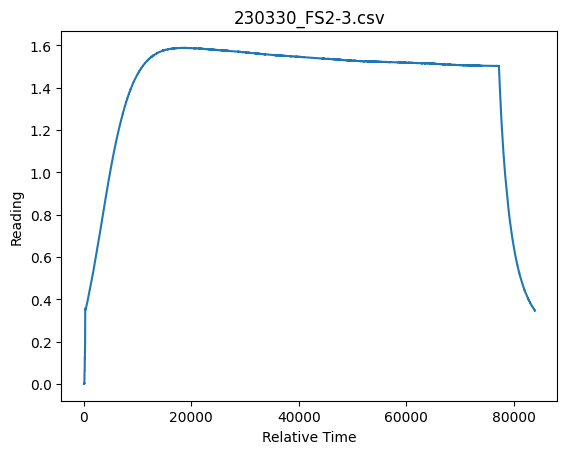

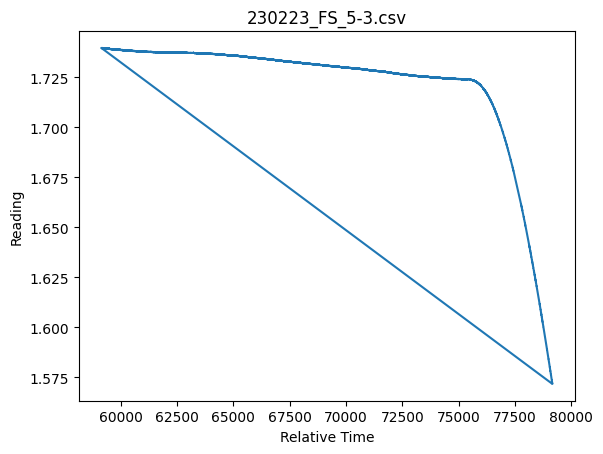

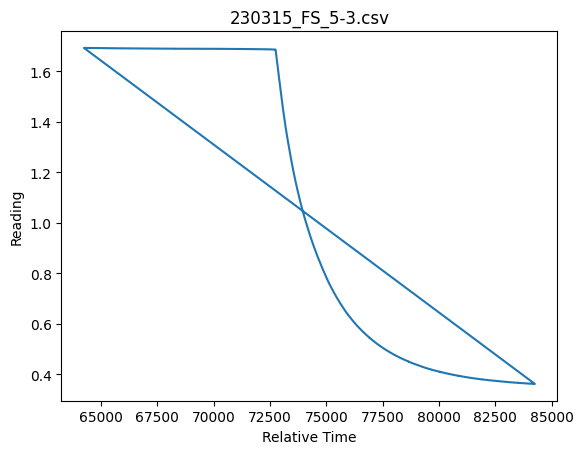

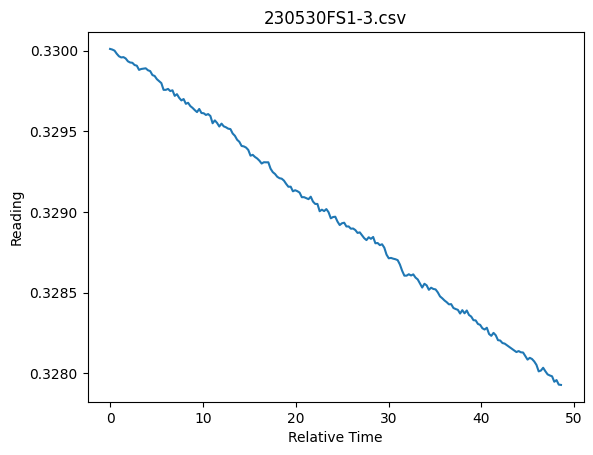

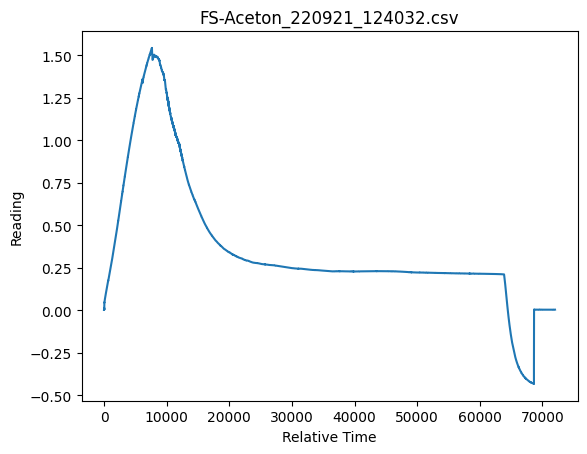

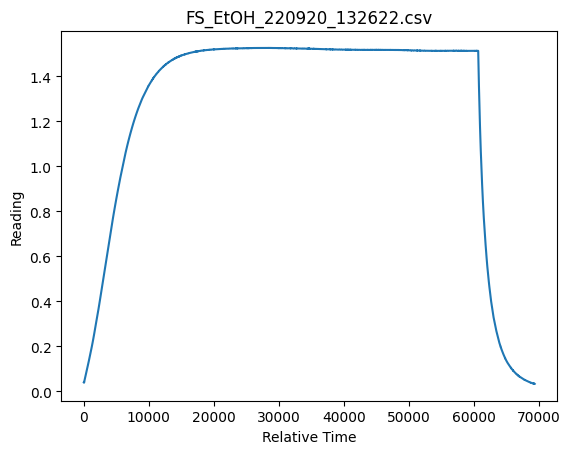

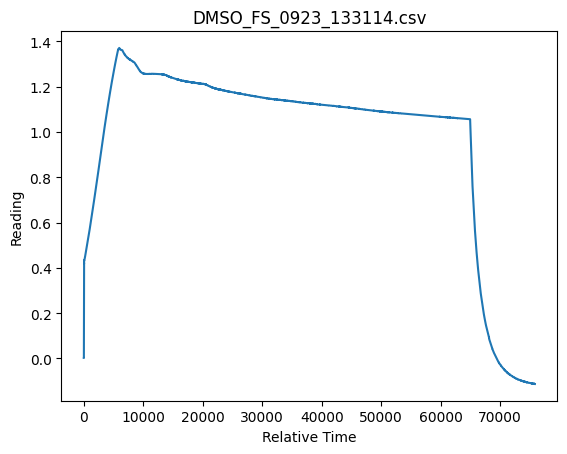

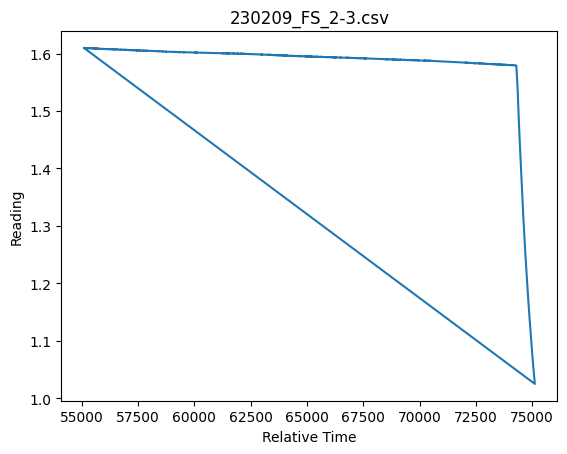

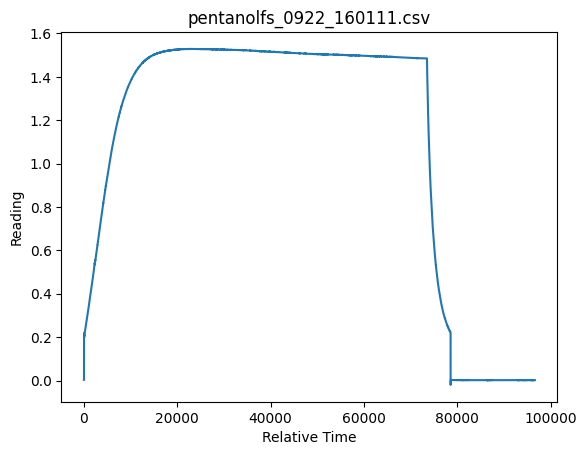

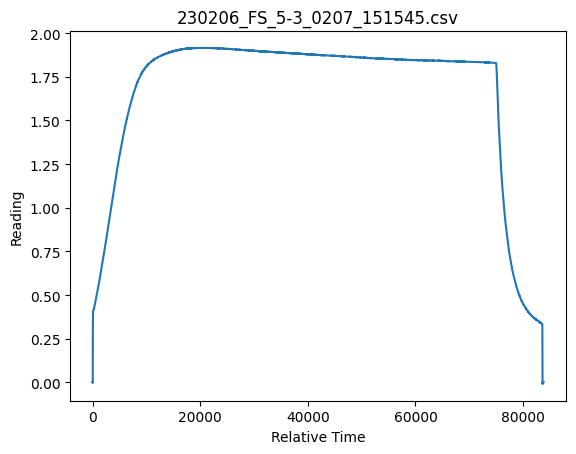

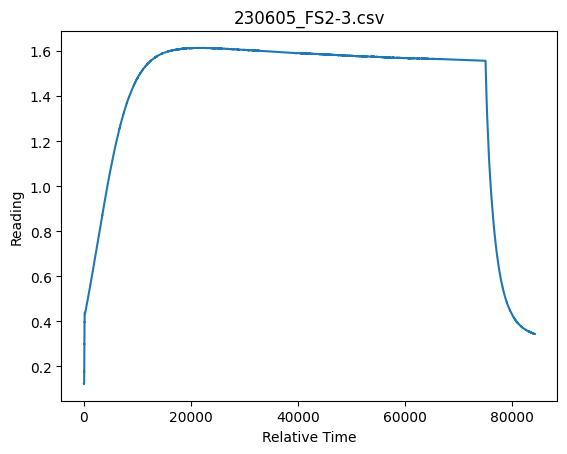

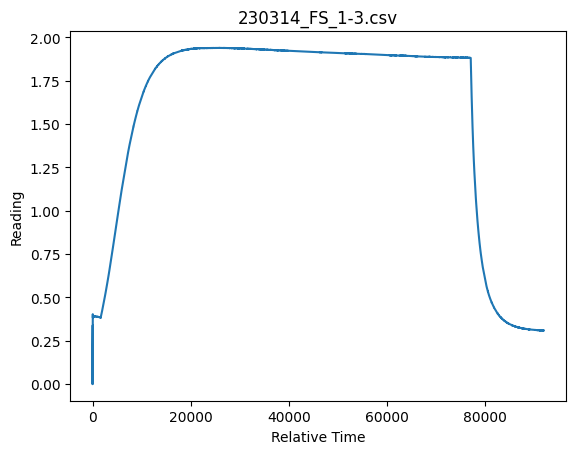

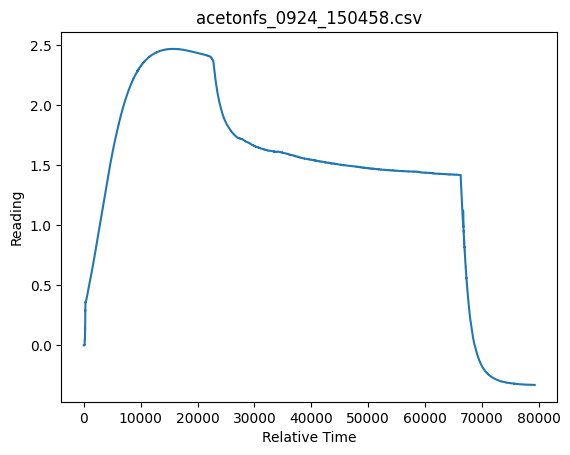

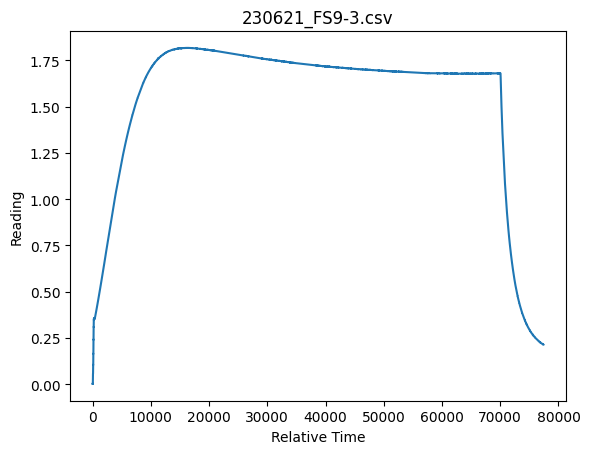

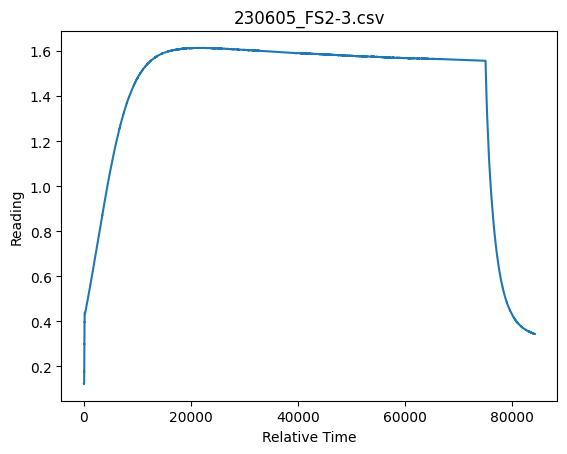

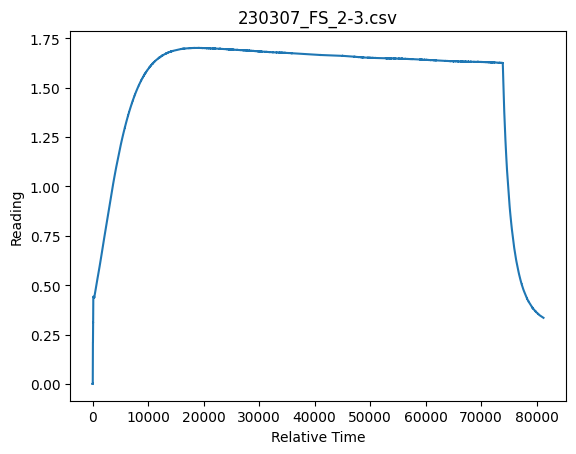

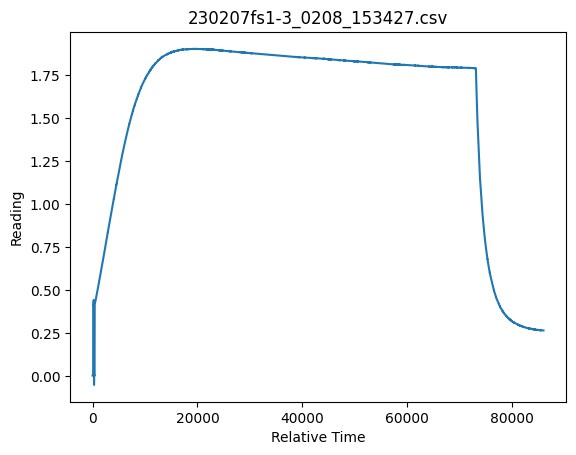

In [12]:
for filepath in file_list:
    try:
        # Read CSV or XLSX
        if filepath.lower().endswith(".csv"):
            df = pd.read_csv(filepath, sep=',', skiprows=8)  # adjust skiprows if needed
        else:
            df = pd.read_excel(filepath)

        # Optional: add experiment/file name
        df["Experiment"] = os.path.basename(filepath)

        # Example: plot (adjust column names as needed)
        plt.figure()
        plt.plot(df["Relative Time"], df["Reading"])
        plt.title(df["Experiment"].iloc[0])
        plt.xlabel("Relative Time")
        plt.ylabel("Reading")
        plt.show()

        # Clean up memory
        del df

    except Exception as e:
        print(f"❌ Error processing {filepath}: {e}")